## Load metadata

In [8]:
import pandas as pd

metadata_path = '/content/drive/MyDrive/cse151a_groupProject/isic-2024-challenge/train-metadata.csv'
metadata = pd.read_csv(metadata_path, low_memory=False)

In [9]:
print(metadata.columns)
print(metadata.head())

if 'tbp_lv_color_std_mean' in metadata.columns:
    print("column 'tbp_lv_color_std_mean' found")
else:
    print("column 'tbp_lv_color_std_mean' column not found")


Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = metadata['tbp_lv_color_std_mean'].values.reshape(-1, 1)
y = metadata['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training MSE: 0.0009921177446762536
Testing MSE: 0.00091923776267699


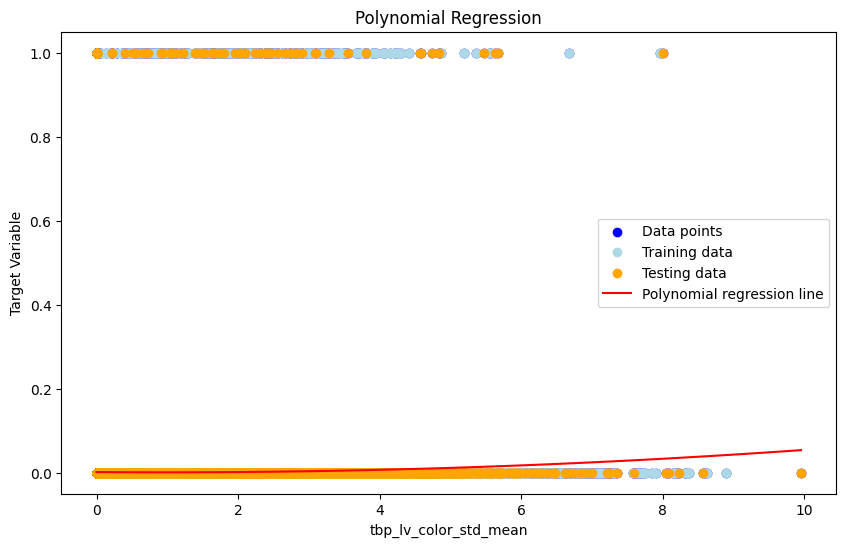

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.scatter(X_train, y_train, color='lightblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Testing data')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression line')
plt.xlabel('tbp_lv_color_std_mean')
plt.ylabel('Target Variable')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

metadata['age_approx'].fillna(metadata['age_approx'].mean(), inplace=True)

features = ['tbp_lv_color_std_mean', 'age_approx']
target_variable = 'target'

X = metadata[features].values
y = metadata[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Training R2: {r2_score(y_train, y_train_pred)}")
print(f"Testing R2: {r2_score(y_test, y_test_pred)}")


Training MSE: 0.0009920215514298504
Testing MSE: 0.0009191845957801785
Training R2: 0.0012416660413434588
Testing R2: 0.002733550450728983


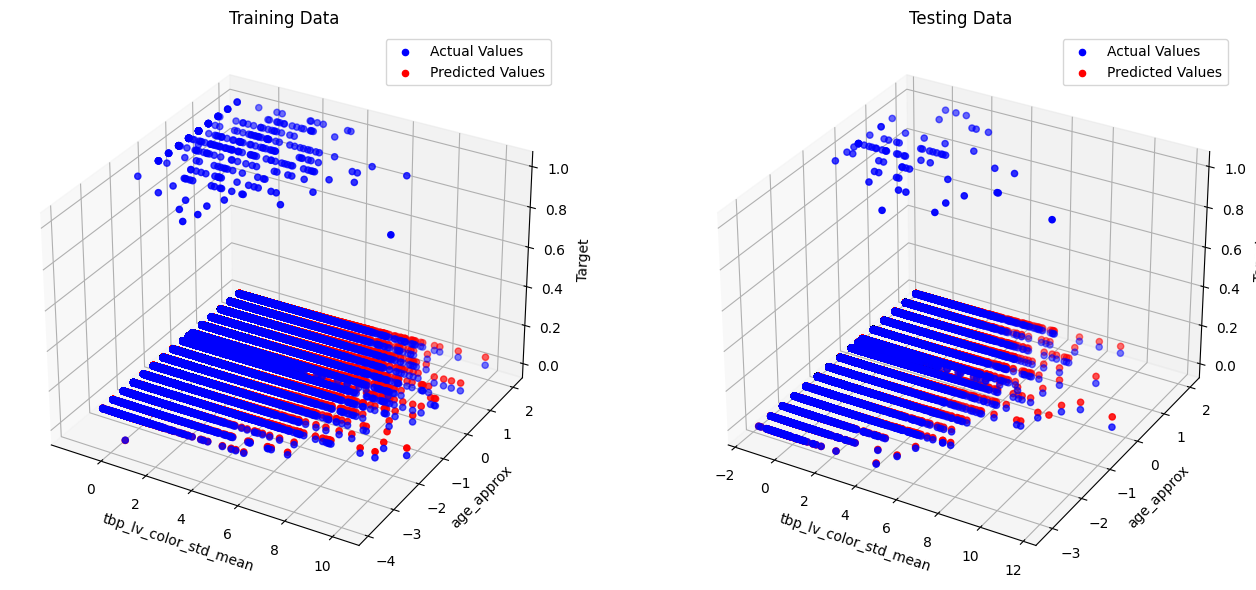

In [14]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, color='blue', label='Actual Values')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train_pred, color='red', label='Predicted Values')
ax.set_title('Training Data')
ax.set_xlabel('tbp_lv_color_std_mean')
ax.set_ylabel('age_approx')
ax.set_zlabel('Target')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_test, color='blue', label='Actual Values')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], y_test_pred, color='red', label='Predicted Values')
ax.set_title('Testing Data')
ax.set_xlabel('tbp_lv_color_std_mean')
ax.set_ylabel('age_approx')
ax.set_zlabel('Target')
ax.legend()

plt.tight_layout()
plt.show()


chatgpt usage:
"do you use multiple features or just one feature for polynomial regression"
"this is the plot from the polynomial model. interpret it please"